In [ ]:
import os
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
true_data_path = "/content/drive/MyDrive/testDatasets/20241016"
simul_data_path = "/content/drive/MyDrive/training_csv"
list_dirs = ["Healthy", "Motor_1_Steady_state_error", "Motor_1_Stuck", "Motor_2_Steady_state_error", "Motor_2_Stuck", "Motor_3_Steady_state_error", "Motor_3_Stuck", "Motor_4_Steady_state_error", "Motor_4_Stuck"]

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
true_data = []
for dir in list_dirs:
    category_tensor = []
    with os.scandir(os.path.join(true_data_path, dir)) as it:
        for n, file in enumerate(it):
            if os.path.splitext(file.path)[1] == ".csv":
                file = pd.read_csv(file.path, header=None)
                tensor_file = file.values
                category_tensor.append(tensor_file)
        true_data.append(category_tensor)
true_data = torch.Tensor(np.array(true_data)).to(device)
print(true_data.shape)

torch.Size([9, 10, 1000, 6])


In [ ]:
simulated_data = []
for dir in list_dirs:
    category_tensor = []
    with os.scandir(os.path.join(simul_data_path, dir)) as it:
        for n, file in enumerate(it):
            splitext = os.path.splitext(file.path)
            if splitext[1] == ".csv":
                file = pd.read_csv(file.path, header=None)
                tensor_file = file.values
                category_tensor.append(tensor_file)
        simulated_data.append(category_tensor)
simulated_data = torch.Tensor(np.array(simulated_data)).to(device)
print(simulated_data.shape)

torch.Size([9, 400, 1000, 6])


torch.Size([400])


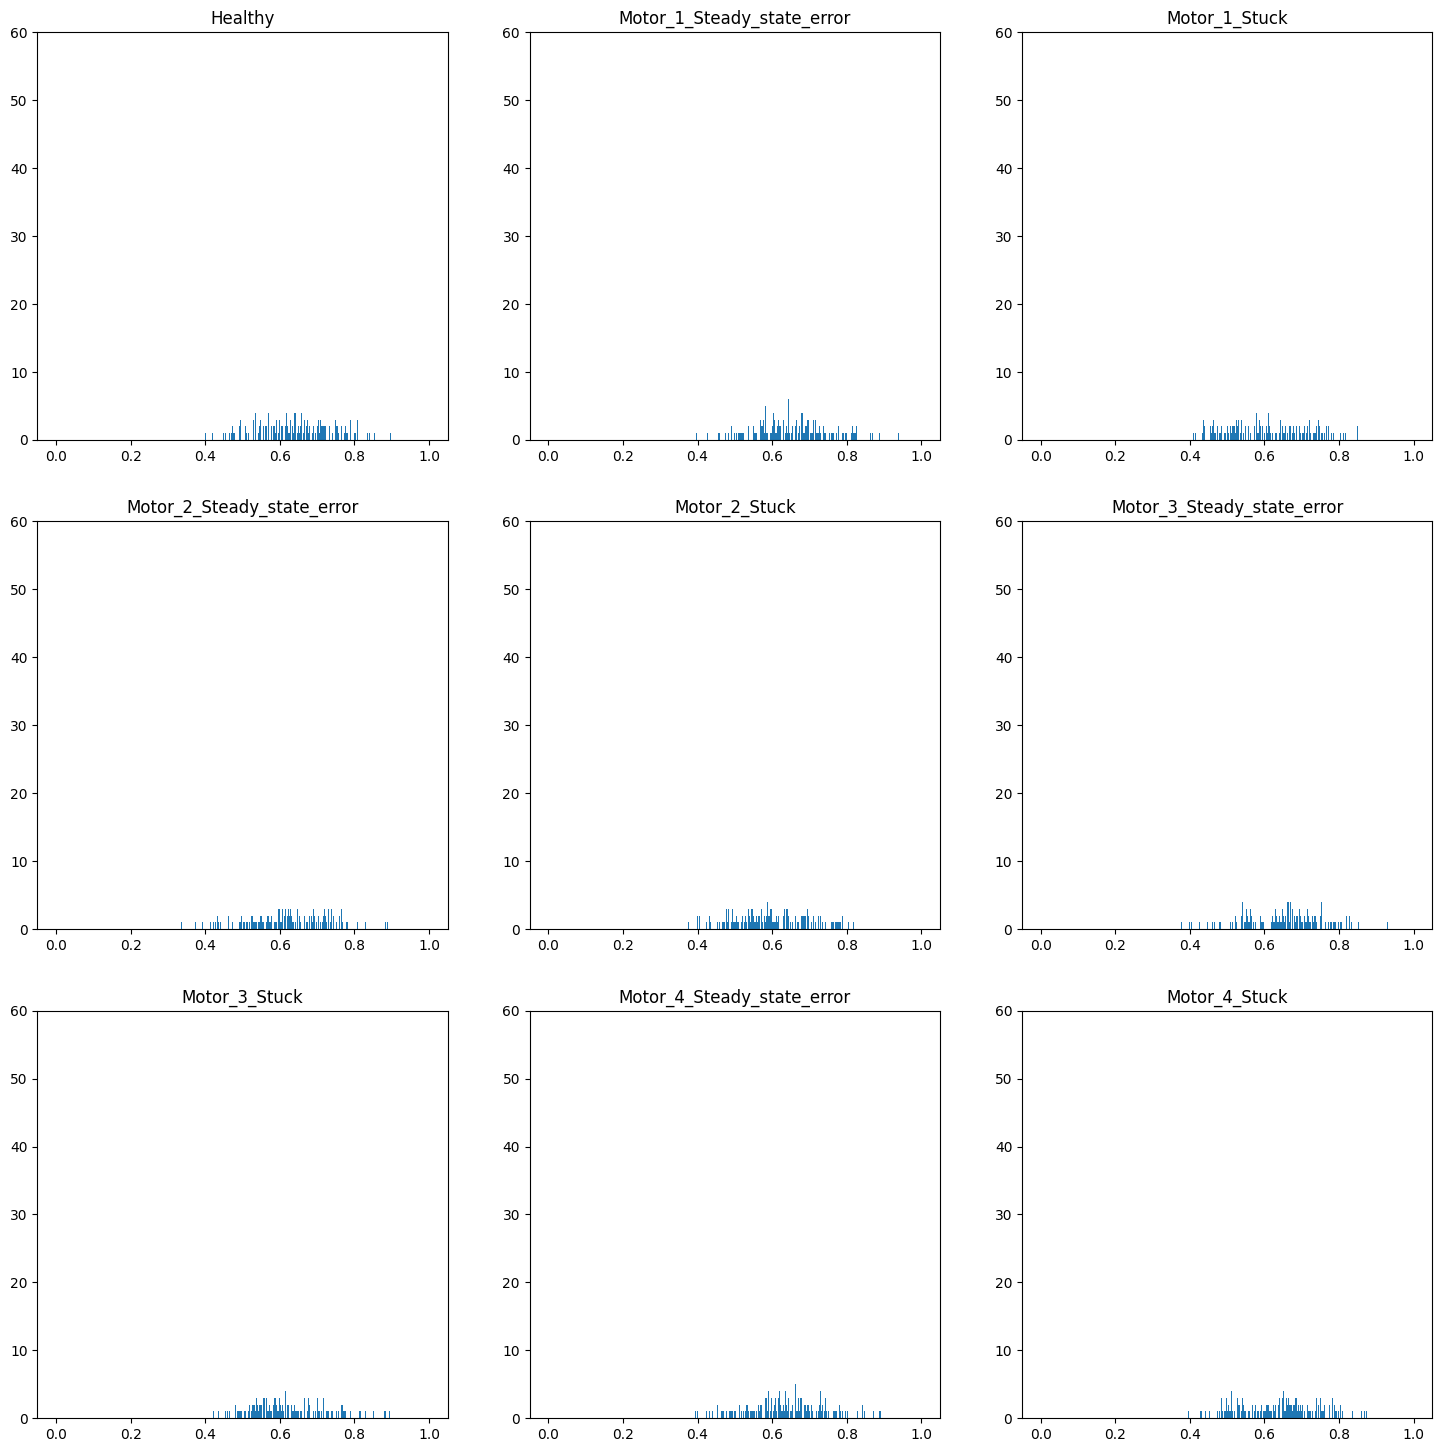

torch.Size([9, 400])


In [ ]:
similarities = []
fig, histograms = plt.subplots(3, 3, figsize=(18, 18))
histograms = histograms.flatten()
for i in range(9):
    similarity = -torch.ones(400).to(device)
    for tensor in true_data[i]:
        iter_similarity = torch.mean(torch.cosine_similarity(tensor, simulated_data[i], dim=1), dim=1)
        similarity = torch.max(similarity, iter_similarity)
    similarities.append(similarity)
    histograms[i].hist(similarity.cpu(), bins=np.linspace(0, 1, 1000))
    histograms[i].set_title(list_dirs[i])
    histograms[i].set_ylim(0, 60)
similarities = torch.cat(similarities).reshape((9, 400))
plt.show()
print(similarities.shape)

In [ ]:
h_quality_indices = similarities > 0.8
m_quality_indices = np.logical_and(similarities.cpu() > 0.75, similarities.cpu() <= 0.8)
for i in range(9):
    h_quality_tensors, m_quality_tensors = simulated_data[i][h_quality_indices[i]], simulated_data[i][m_quality_indices[i]]
    print(h_quality_tensors.shape, m_quality_tensors.shape)
    for tensor in h_quality_tensors:

        pd.save(tensor.cpu().numpy(), )

torch.Size([30, 1000, 6]) torch.Size([33, 1000, 6])
torch.Size([19, 1000, 6]) torch.Size([32, 1000, 6])
torch.Size([20, 1000, 6]) torch.Size([31, 1000, 6])
torch.Size([17, 1000, 6]) torch.Size([33, 1000, 6])
torch.Size([10, 1000, 6]) torch.Size([25, 1000, 6])
torch.Size([18, 1000, 6]) torch.Size([33, 1000, 6])
torch.Size([12, 1000, 6]) torch.Size([31, 1000, 6])
torch.Size([22, 1000, 6]) torch.Size([30, 1000, 6])
torch.Size([20, 1000, 6]) torch.Size([40, 1000, 6])


<ipython-input-34-4f43199669f9>:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  m_quality_indices = np.logical_and(similarities.cpu() > 0.75, similarities.cpu() <= 0.8)
<ipython-input-34-4f43199669f9>:4: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /pytorch/aten/src/ATen/native/IndexingUtils.h:29.)
  h_quality_tensors, m_quality_tensors = simulated_data[i][h_quality_indices[i]], simulated_data[i][m_quality_indices[i]]
